In [31]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [33]:
df = pd.read_csv('Data files/logisticRegression/insurance_data.csv')
df.head()

,age,bought_insurance
0,22,0
1,25,0
2,47,1
3,52,0
4,46,1


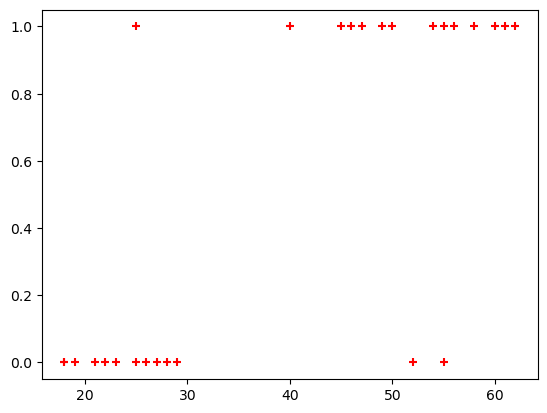

In [81]:
# binary classification - predicting from the two values like yes/no or 0/1 etc.,
plt.scatter(df.age, df.bought_insurance, marker='+', color="red")
plt.show()

In [43]:
df.shape

(27, 2)

In [45]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(df[['age']], df.bought_insurance, train_size=0.9, test_size=0.1)

In [47]:
x_test

,age
5,56
26,23
24,50


In [53]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(x_train, y_train)

LogisticRegression()

In [57]:
model.predict(x_test)

array([1, 0, 1], dtype=int64)

In [59]:
model.score(x_test, y_test)

1.0

In [129]:
# multiclass classification - training the model to predict from more than two values
from sklearn.datasets import load_digits
digits = load_digits()
dir(digits)

['DESCR', 'data', 'feature_names', 'frame', 'images', 'target', 'target_names']

In [65]:
digits.data[0]

array([ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
       15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
       12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
        0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
       10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.])

<Figure size 640x480 with 0 Axes>

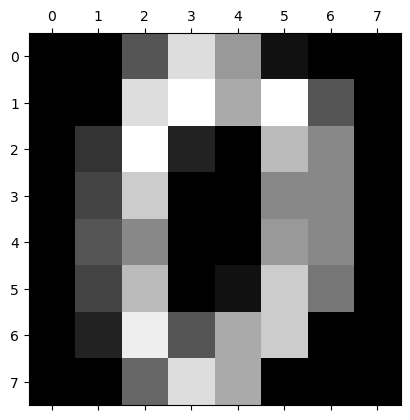

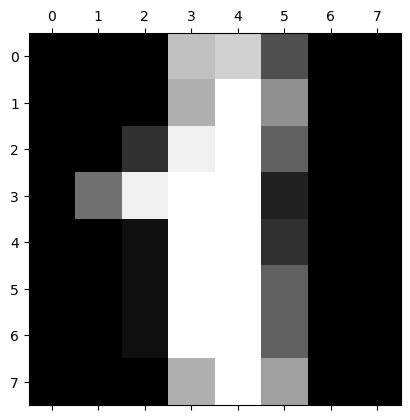

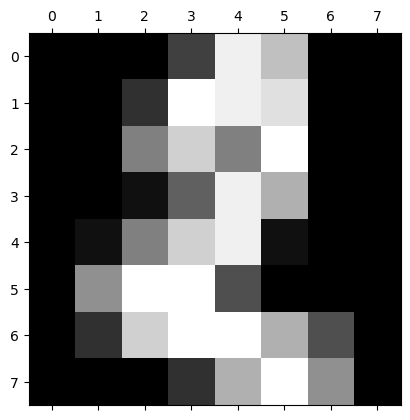

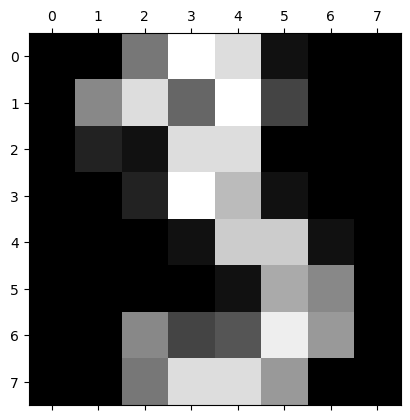

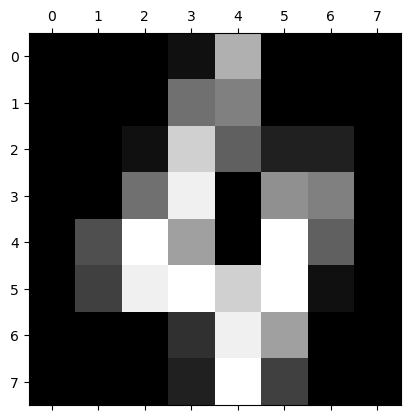

In [137]:
plt.gray()
for i in range(5):
    plt.matshow(digits.images[i])
plt.show()

In [95]:
digits.target[0:5]

array([0, 1, 2, 3, 4])

In [97]:
X_train, X_test, Y_train, Y_test = train_test_split(digits.data, digits.target, test_size=0.2, train_size=0.8)
len(X_train)

1437

In [101]:
len(X_test)

360

In [107]:
mulModel = LogisticRegression(max_iter=1000)
mulModel.fit(X_train, Y_train)

LogisticRegression(max_iter=1000)

In [111]:
mulModel.score(X_test, Y_test)

0.9638888888888889

In [117]:
mulModel.predict(digits.data[0:5])

array([0, 1, 2, 3, 4])

In [121]:
# confusion matrix - used for finding where the model is predicting wrongly
y_predicted = mulModel.predict(X_test)
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(Y_test, y_predicted)
cm

array([[33,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 40,  0,  0,  0,  0,  0,  0,  1,  0],
       [ 0,  0, 27,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 38,  0,  0,  0,  0,  1,  0],
       [ 0,  0,  0,  0, 41,  0,  0,  0,  0,  0],
       [ 0,  1,  0,  0,  0, 38,  0,  1,  0,  1],
       [ 0,  0,  0,  0,  0,  0, 32,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  1,  0, 33,  0,  0],
       [ 0,  4,  0,  0,  0,  0,  0,  0, 36,  0],
       [ 1,  0,  0,  1,  0,  0,  0,  0,  1, 29]], dtype=int64)

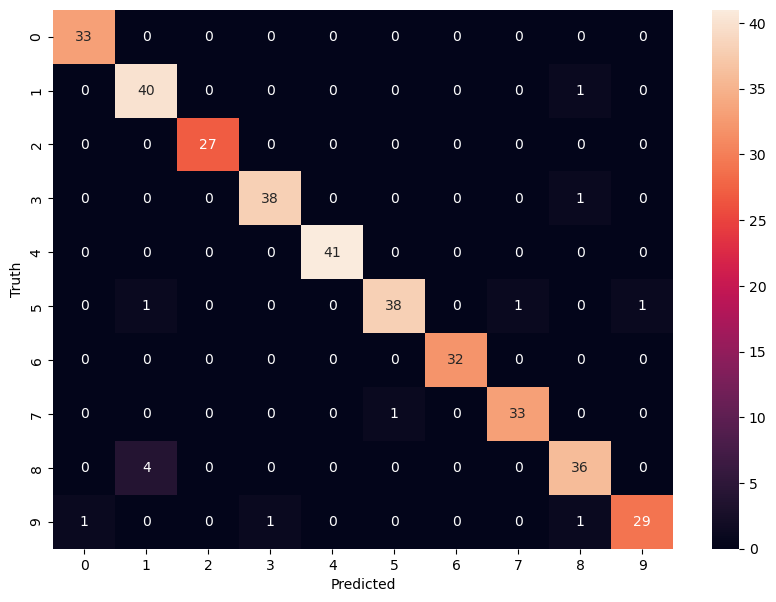

In [139]:
import seaborn as sn
plt.figure(figsize=(10, 7))
sn.heatmap(cm, annot=True)
plt.xlabel("Predicted")
plt.ylabel("Truth")
plt.show()